In [20]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from pyproj import Transformer

In [29]:
# 获取当前 Notebook 所在路径
notebook_dir = os.path.abspath('')

# 构建 CSV 文件和 Shapefile 的完整路径
csv_path = os.path.join(notebook_dir, "destination_dataXY1.csv")
shapefile_path = os.path.join(notebook_dir, "S_alldata.shp")

# 读取 CSV 数据
csv_data = pd.read_csv(csv_path)

# 定义坐标转换器：从 "EPSG:4326" 到 "EPSG:27700"
transformer = Transformer.from_crs("EPSG:4326", "EPSG:27700", always_xy=True)

# 将 CSV 数据的坐标统一到 "EPSG:27700"
csv_data['X_27700'], csv_data['Y_27700'] = zip(*[transformer.transform(x, y) for x, y in zip(csv_data['lon'], csv_data['lat'])])

# 将 CSV 数据转换为 GeoDataFrame
geometry = [Point(xy) for xy in zip(csv_data['X_27700'], csv_data['Y_27700'])]
csv_gdf = gpd.GeoDataFrame(csv_data, geometry=geometry, crs="EPSG:27700")

# 读取 Shapefile
shapefile_data = gpd.read_file(shapefile_path)

# 空间连接：将 destination 点数据的各列按空间位置与 Shapefile 面数据 进行连接，包括内部和边线上的点，并保留所有点
merged_data = gpd.sjoin(csv_gdf, shapefile_data, how="left", op="intersects")

# 计算相同多边形内的客流量之和
merged_data['sum_flow'] = merged_data.groupby('index_right')['inbound_counts'].transform('sum')

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [31]:
# 获取当前 Notebook 所在路径
notebook_dir = os.path.abspath('')

# 构建 CSV 文件和 Shapefile 的完整路径
csv_path = os.path.join(notebook_dir, "destination_dataXY1.csv")
shapefile_path = os.path.join(notebook_dir, "S_alldata.shp")

# 读取 CSV 数据
csv_data = pd.read_csv(csv_path)

# 定义坐标转换器：从 "EPSG:4326" 到 "EPSG:27700"
transformer = Transformer.from_crs("EPSG:4326", "EPSG:27700", always_xy=True)

# 将 CSV 数据的坐标统一到 "EPSG:27700"
csv_data['X_27700'], csv_data['Y_27700'] = zip(*[transformer.transform(x, y) for x, y in zip(csv_data['lon'], csv_data['lat'])])

# 将 CSV 数据转换为 GeoDataFrame
geometry = [Point(xy) for xy in zip(csv_data['X_27700'], csv_data['Y_27700'])]
csv_gdf = gpd.GeoDataFrame(csv_data, geometry=geometry, crs="EPSG:27700")

# 读取 Shapefile
shapefile_data = gpd.read_file(shapefile_path)

In [28]:
# 计算每个多边形的面积并创建新字段
shapefile_data['PolygonArea'] = shapefile_data.geometry.area

# 将 "AllusualRe" 字段的值除以面积，然后添加到新字段 "NewField"
shapefile_data['POPDEN'] = shapefile_data['AllusualRe'] /shapefile_data['PolygonArea']

# 保存修改后的 GeoDataFrame 到新的 shapefile 文件
output_shapefile_path = "S_alldata_popden1.shp"  # 请设置输出文件路径
shapefile_data.to_file(output_shapefile_path)

# 显示前几行数据以检查结果
shapefile_data.head()

/tmp/ipykernel_27551/2365151658.py:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  shapefile_data.to_file(output_shapefile_path)


,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,IMD_Rank,IMD_Decile,LSOA01NM,LADcd,LADnm,...,Deprivatio,NoCar,OfficeWork,MetroCommu,BusCommute,CarorVanCo,CycleCommu,geometry,PolygonArea,POPDEN
0,E01000001,City of London 001A,City of London 001A,133320.768872,2291.846072,29199,9,City of London 001A,E09000001,City of London,...,0.003580,0.659880,0.150943,0.156250,0.053571,0.080357,0.107143,"POLYGON ((532105.092 182011.230, 532162.491 18...",133320.768872,0.011131
1,E01000002,City of London 001B,City of London 001B,226191.272990,2433.960112,30379,10,City of London 001B,E09000001,City of London,...,0.001214,0.703524,0.148336,0.146341,0.073171,0.092683,0.121951,"POLYGON ((532746.813 181786.891, 532671.688 18...",226191.272990,0.006110
2,E01000003,City of London 001C,City of London 001C,57302.966538,1142.359799,14915,5,City of London 001C,E09000001,City of London,...,0.029557,0.814413,0.238095,0.187013,0.067532,0.070130,0.161039,"POLYGON ((532135.145 182198.119, 532158.250 18...",57302.966538,0.028218
3,E01000005,City of London 001E,City of London 001E,190738.760504,2167.868343,8678,3,City of London 001E,E09000001,City of London,...,0.086498,0.782881,0.267760,0.234694,0.153061,0.108844,0.068027,"POLYGON ((533807.946 180767.770, 533649.063 18...",190738.760504,0.005757
4,E01000850,Camden 026A,Camden 026A,195651.361183,3323.641884,19686,6,Camden 026A,E09000007,Camden,...,0.024390,0.804538,0.267744,0.125984,0.060367,0.044619,0.062992,"POLYGON ((529743.700 182156.878, 529886.000 18...",195651.361182,0.007273


/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


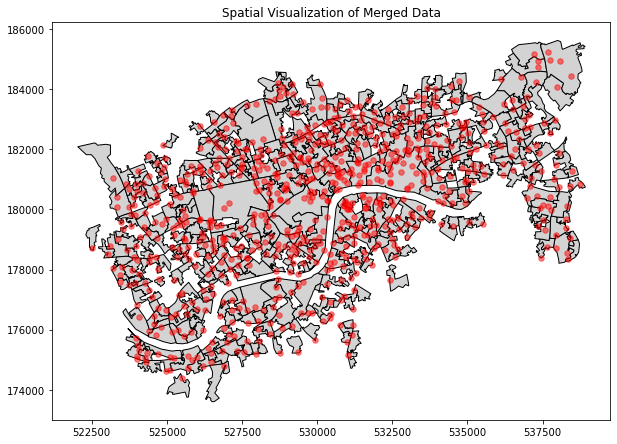

In [35]:
# 读取 shapefile 数据
shapefile_path = "S_alldata_popden1.shp"  # 请将路径替换为您的 shapefile 文件路径
gdf = gpd.read_file(shapefile_path)


# 空间连接：将 destination 数据按空间位置与 Shapefile 进行连接，包括内部和边线上的点，并保留所有点
merged_data = gpd.sjoin(csv_gdf, gdf, how="left", op="intersects")

# 可视化
fig, ax = plt.subplots(figsize=(10, 10))
shapefile_data.plot(ax=ax, color='lightgray', edgecolor='black')
merged_data.plot(ax=ax, color='red', markersize=30, alpha=0.5)
plt.title("Spatial Visualization of Merged Data")
plt.show()

In [36]:
merged_data.head()

,EndStation Id,inbound_counts,id,startname,lat,lon,capacity,count_ratio,X_27700,Y_27700,...,StudentRat,Deprivatio,NoCar,OfficeWork,MetroCommu,BusCommute,CarorVanCo,CycleCommu,PolygonAre,POPDEN
0,310,10453,310,"Black Prince Road, Vauxhall",51.490868,-0.116912,1,0.001235,530831.627076,178561.057565,...,0.118017,0.056000,0.698391,0.302393,0.177606,0.239382,0.137066,0.086873,97918.956658,0.017494
1,11,11382,11,"Brunswick Square, Bloomsbury",51.523951,-0.122502,1,0.001345,530349.157099,182230.088462,...,0.298373,0.103064,0.838665,0.216370,0.226974,0.138158,0.088816,0.082237,58450.807630,0.024037
2,70,4078,70,"Calshot Street , King's Cross",51.531361,-0.117070,0,0.000482,530704.797122,183063.697166,...,0.071967,0.049793,0.764338,0.201980,0.252451,0.174020,0.107843,0.095588,151014.246002,0.013376
3,804,18282,804,"Good's Way, King's Cross",51.534668,-0.125079,3,0.002160,530139.900885,183417.199808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,601716.097518,NaN
4,14,39793,14,"Argyle Street, Kings Cross",51.529416,-0.123944,0,0.004702,530233.540820,182835.203026,...,0.112687,0.101031,0.770021,0.237733,0.165698,0.177326,0.139535,0.078488,77020.832131,0.018787


In [37]:
# 导出为 CSV
output_csv_path = os.path.join(notebook_dir, "destination_variables909.csv")
merged_data.to_csv(output_csv_path, index=False)

In [5]:
trips = pd.read_csv("destination_variables908.csv")
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 88 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EndStation Id   788 non-null    int64  
 1   inbound_counts  788 non-null    int64  
 2   id              788 non-null    int64  
 3   startname       788 non-null    object 
 4   lat             788 non-null    float64
 5   lon             788 non-null    float64
 6   capacity        788 non-null    int64  
 7   count_ratio     788 non-null    float64
 8   X_27700         788 non-null    float64
 9   Y_27700         788 non-null    float64
 10  geometry        788 non-null    object 
 11  index_right     784 non-null    float64
 12  lsoa11cd        784 non-null    object 
 13  lsoa11nm        784 non-null    object 
 14  lsoa11nmw       784 non-null    object 
 15  st_areasha      784 non-null    float64
 16  st_lengths      784 non-null    float64
 17  IMD_Rank        784 non-null    flo

In [6]:
# check the null value of dataframe "trips"
null_counts = trips.isnull().sum()

# 打印每列中的空值数量
print(null_counts)
null_counts = trips.isnull().sum()

# 打印每列中的空值数量
print(null_counts)

EndStation Id       0
inbound_counts      0
id                  0
startname           0
lat                 0
                 ... 
OfficeWork        108
MetroCommu        108
BusCommute        108
CarorVanCo        108
CycleCommu        108
Length: 88, dtype: int64
EndStation Id       0
inbound_counts      0
id                  0
startname           0
lat                 0
                 ... 
OfficeWork        108
MetroCommu        108
BusCommute        108
CarorVanCo        108
CycleCommu        108
Length: 88, dtype: int64
